In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import gc 

In [2]:
data ="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
df = pd.read_csv(data, sep=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')>

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
df.isnull().sum().values.sum()

0

Converting conversionvalue to 1 and 0

In [7]:
df['converted'] = df['y'].apply(lambda x: 0 if  x == "no" else 1)
del df['y']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Visualization how conversion changes with income

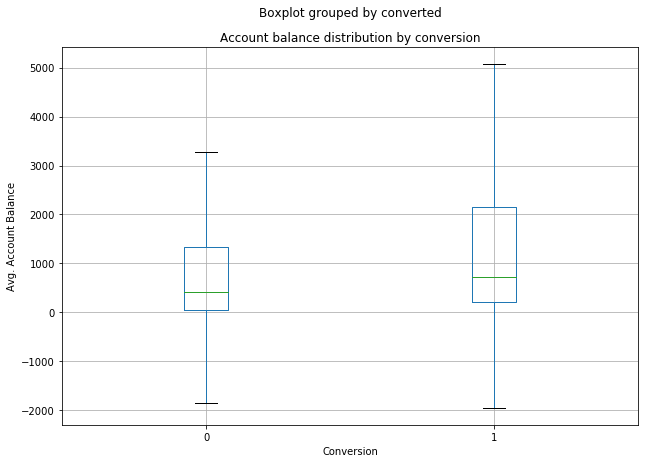

In [8]:
ax = df[["converted","balance"]].boxplot(by='converted', showfliers=False, figsize=(10,7))

ax.set_xlabel("Conversion")
ax.set_ylabel("Avg. Account Balance")
ax.set_title("Account balance distribution by conversion")

plt.show()

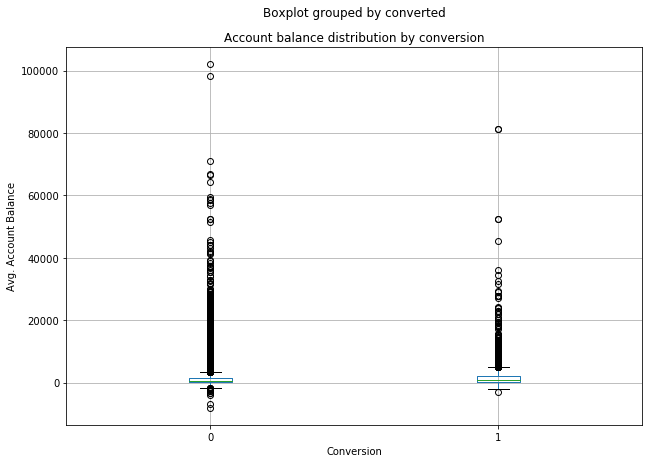

In [9]:
ax = df[["converted","balance"]].boxplot(by='converted', showfliers=True, figsize=(10,7))

ax.set_xlabel("Conversion")
ax.set_ylabel("Avg. Account Balance")
ax.set_title("Account balance distribution by conversion")

plt.show()

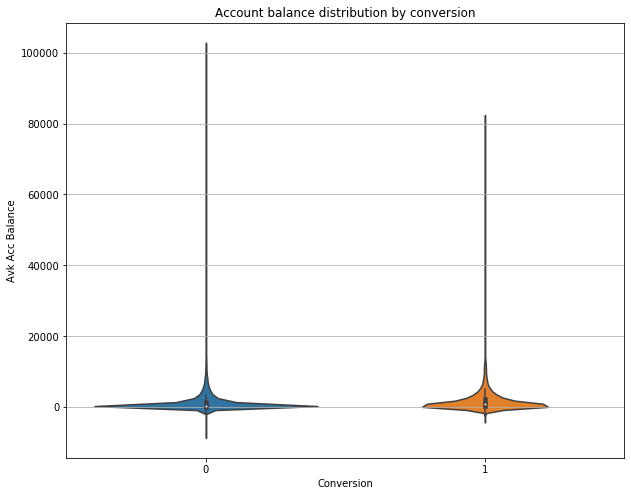

In [10]:
fontsize = 10 
fig, axes = plt.subplots()

fig.set_size_inches(10,8)

sns.violinplot("converted", "balance", data=df, ax = axes)
axes.set_title("Account balance distribution by conversion")

axes.yaxis.grid(True)
axes.set_xlabel("Conversion")
axes.set_ylabel("Avk Acc Balance")

plt.show()

In [11]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [12]:
conversion_by_contacts = df.groupby('campaign').converted.sum() / df.groupby('campaign').converted.count() * 100.0

conversion_by_contacts.sample(10)

campaign
28     0.000000
44     0.000000
21     2.857143
37     0.000000
8      5.925926
33     0.000000
63     0.000000
1     14.597583
32    11.111111
7      6.394558
Name: converted, dtype: float64

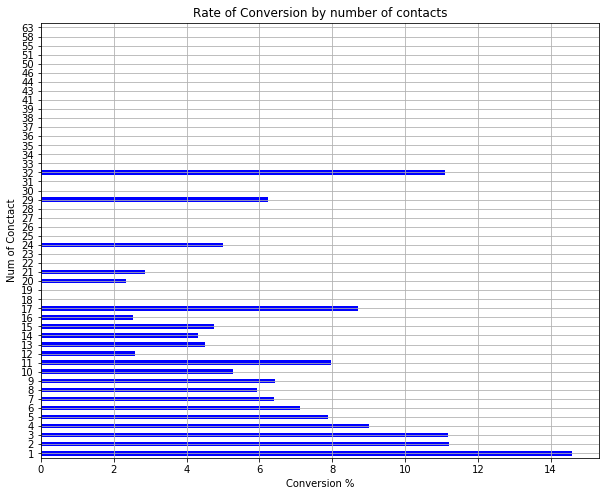

In [13]:
ax = conversion_by_contacts.plot(
    kind = 'barh',
    figsize=(10,8),
    title= "Rate of Conversion by number of contacts",
    grid = True,
    color = 'blue'
)

ax.set_xlabel('Conversion %')
ax.set_ylabel("Num of Conctact")


plt.show()


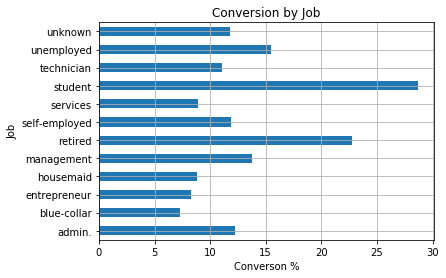

In [14]:
conversion_rate_by_job = df.groupby('job').converted.sum() / df.groupby('job').converted.count() * 100.0

ax = conversion_rate_by_job.plot(
    kind = 'barh',
    grid = True,
    title = "Conversion by Job"
)

ax.set_xlabel('Converson %')
ax.set_ylabel('Job')

plt.show()

# Preping data for classification

In [15]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
converted       2
dtype: int64

In [16]:
# categorical data
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['job',
 'month',
 'marital',
 'default',
 'poutcome',
 'loan',
 'contact',
 'education',
 'housing']

# Encocding categorical  variables (cat_cols)

In [17]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
df.groupby('month').count().converted

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [19]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df.month = df.month.apply(lambda x:months.index(x) +1)
df["month"].sample(15)

21699     8
16145     7
37955     5
28663     1
1800      5
4236      5
44166     7
31296     3
2044      5
30099     2
24280    11
38877     5
5372      5
11525     6
38593     5
Name: month, dtype: int64

In [20]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
df =pd.get_dummies(data=df, columns=['job'])
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['housing'] = df["housing"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,1,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,1,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,1,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,1,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,0,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [24]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,1,0,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,1,0,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,1,1,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,1,0,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,0,0,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [27]:
df = pd.get_dummies(data=df, columns=["education"])
df.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,married,no,2143,1,0,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,single,no,29,1,0,unknown,5,5,151,...,0,0,0,1,0,0,0,1,0,0
2,33,married,no,2,1,1,unknown,5,5,76,...,0,0,0,0,0,0,0,1,0,0
3,47,married,no,1506,1,0,unknown,5,5,92,...,0,0,0,0,0,0,0,0,0,1
4,33,single,no,1,0,0,unknown,5,5,198,...,0,0,0,0,0,1,0,0,0,1


In [28]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
df = pd.get_dummies(data=df, columns=["contact"])
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,married,no,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,single,no,29,1,0,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1
2,33,married,no,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,0,1
3,47,married,no,1506,1,0,5,5,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,single,no,1,0,0,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1


In [30]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['default'] = df["default"].apply(lambda x: 1 if x == "yes" else 0 )
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,married,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,single,0,29,1,0,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1
2,33,married,0,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,0,1
3,47,married,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,single,0,1,0,0,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1


In [32]:
df["poutcome"].unique() 

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [33]:
df = pd.get_dummies(data = df, columns=['poutcome'])
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,single,0,29,1,0,5,5,151,1,...,1,0,0,0,0,1,0,0,0,1
2,33,married,0,2,1,1,5,5,76,1,...,1,0,0,0,0,1,0,0,0,1
3,47,married,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,0,0,1
4,33,single,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [34]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [35]:
df = pd.get_dummies(data = df, columns=['marital'])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,1,0,0,0,1,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,1,0,0,0,1,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,0,1,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [36]:
#cheking for any categorical columns left 
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  converted            45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [38]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'converted', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'marital_divorced',
       'marital_married', 'marital_single'],
      dtype='object')